In [1]:
import pandas as pd

# path = 'D:/20240416/5. data_analysis_workspace/0_project/음원 데이터를 활용한 주간음원순위 예측.csv'

path = 'new_before_nomalization_ccwt241002.csv'
data = pd.read_csv(path)

data.head()

,date,Rank,Title,New_Artist,Production,Runtime,WeeklyViews,ky_rank,n_score,g_score,...,sub_cate_R&B/Soul,sub_cate_Rap/Hip-hop,sub_cate_Rock,sub_cate_Traditional,sub_cate_Trot,sub_cate_World Music,season_autumn,season_spring,season_summer,season_winter
0,2024-01-21,111,@은영이에게,#안녕,니즈뮤직,292,1494289.0,NaN,44.39183,65.0,...,0,0,0,0,0,0,0,0,0,1
1,2024-01-28,120,@은영이에게,#안녕,니즈뮤직,292,1959168.0,NaN,31.71549,62.0,...,0,0,0,0,0,0,0,0,0,1
2,2024-02-04,147,@은영이에게,#안녕,니즈뮤직,292,1610044.0,NaN,25.52037,61.0,...,0,0,0,0,0,0,0,0,0,1
3,2024-02-11,154,@은영이에게,#안녕,니즈뮤직,292,1400603.0,NaN,24.18861,66.0,...,0,0,0,0,0,0,0,0,0,1
4,2024-02-18,176,@은영이에게,#안녕,니즈뮤직,292,1342797.0,NaN,25.88537,63.0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
data['date'].unique()

array(['2024-01-21', '2024-01-28', '2024-02-04', '2024-02-11',
       '2024-02-18', '2023-11-19', '2023-11-26', '2023-12-03',
       '2023-12-10', '2023-12-17', '2023-12-24', '2023-12-31',
       '2024-01-07', '2024-01-14', '2024-02-25', '2024-03-03',
       '2024-03-10', '2024-03-17', '2024-03-24', '2024-04-07',
       '2024-04-14', '2024-07-07', '2024-08-25', '2023-09-24',
       '2023-10-01', '2023-10-08', '2023-10-15', '2023-10-22',
       '2023-10-29', '2023-11-05', '2023-11-12', '2024-03-31',
       '2024-04-21', '2024-04-28', '2024-05-05', '2024-05-12',
       '2024-05-19', '2024-05-26', '2024-06-02', '2024-06-09',
       '2024-06-16', '2024-06-23', '2024-06-30', '2024-07-14',
       '2024-07-21', '2024-07-28', '2024-08-04', '2024-08-11',
       '2024-08-18', '2024-09-01', '2024-09-08'], dtype=object)

In [3]:

data_info = data.info()

# Filter out rows where the number of entries is less than 10682
filtered_columns = [col for col in data.columns if data[col].count() < 10682]

filtered_columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     10682 non-null  object 
 1   Rank                     10682 non-null  int64  
 2   Title                    10682 non-null  object 
 3   New_Artist               10682 non-null  object 
 4   Production               10682 non-null  object 
 5   Runtime                  10682 non-null  int64  
 6   WeeklyViews              8011 non-null   float64
 7   ky_rank                  458 non-null    float64
 8   n_score                  9845 non-null   float64
 9   g_score                  10537 non-null  float64
 10  major_cate_Classical     10682 non-null  int64  
 11  major_cate_J-pop         10682 non-null  int64  
 12  major_cate_Jazz          10682 non-null  int64  
 13  major_cate_K-pop         10682 non-null  int64  
 14  major_cate_OST        

['WeeklyViews', 'ky_rank', 'n_score', 'g_score']

In [4]:
# 중간값, 평균값, 분산값 계산하기
columns_to_analyze = ['WeeklyViews', 'ky_rank', 'n_score', 'g_score']

# 각 컬럼의 중간값, 평균값, 분산값 계산
median_values = data[columns_to_analyze].median().astype(int)
mean_values = data[columns_to_analyze].mean().astype(int)

median_values, mean_values





(WeeklyViews    3781395
 ky_rank             44
 n_score             35
 g_score             20
 dtype: int32,
 WeeklyViews    4878271
 ky_rank             47
 n_score             38
 g_score             26
 dtype: int32)

In [5]:
# 각 컬럼의 Min-Max 정규화를 적용한 후 25% 및 75% 값을 계산

# Min-Max 정규화 함수
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# 각 컬럼에 Min-Max 정규화를 적용
normalized_data = data[columns_to_analyze].apply(min_max_normalize)

# 25%와 75% 값 계산
quantiles_25_75 = normalized_data.quantile([0.25, 0.75])

quantiles_25_75


,WeeklyViews,ky_rank,n_score,g_score
0.25,0.042404,0.141414,0.194609,0.06
0.75,0.188109,0.808081,0.510931,0.43


In [6]:
# Weekly Views 컬럼에서 상위 2%와 하위 2%를 제외한 상위 10개와 하위 10개를 조회하는 코드
weekly_views_col = data['WeeklyViews']

# 상위 2%와 하위 2% 기준 값 계산
lower_2_percent = weekly_views_col.quantile(0.02)
upper_2_percent = weekly_views_col.quantile(0.98)

# 상위 2%와 하위 2%를 제외한 데이터 필터링
filtered_weekly_views = weekly_views_col[(weekly_views_col > lower_2_percent) & (weekly_views_col < upper_2_percent)]

# 상위 10개 및 하위 10개 값 조회
top_10 = filtered_weekly_views.nlargest(10)
bottom_10 = filtered_weekly_views.nsmallest(10)

# 상위 2%와 하위 2% 값도 따로 출력
top_2_percent = weekly_views_col.nlargest(int(len(weekly_views_col) * 0.02))
bottom_2_percent = weekly_views_col.nsmallest(int(len(weekly_views_col) * 0.02))

top_10, bottom_10, top_2_percent, bottom_2_percent


(1291    15491282.0
 1292    15491282.0
 1316    15491282.0
 1344    15491282.0
 1378    15491282.0
 1424    15491282.0
 1475    15491282.0
 1492    15491282.0
 1544    15491282.0
 1595    15491282.0
 Name: WeeklyViews, dtype: float64,
 6360     1448621.0
 3381     1448985.0
 1017     1449758.0
 6998     1449773.0
 281      1449958.0
 2298     1450992.0
 8366     1451780.0
 10324    1453139.0
 1803     1453811.0
 6359     1454362.0
 Name: WeeklyViews, dtype: float64,
 1267    27196352.0
 1268    27196352.0
 1332    27196352.0
 1366    27196352.0
 1412    27196352.0
            ...    
 1647    15095802.0
 1660    15095802.0
 1711    15095802.0
 1724    15095802.0
 1877    15030288.0
 Name: WeeklyViews, Length: 213, dtype: float64,
 8226    1236519.0
 706     1237511.0
 746     1237511.0
 704     1242711.0
 744     1242711.0
           ...    
 9850    1470643.0
 8219    1472148.0
 4076    1472656.0
 699     1474789.0
 739     1474789.0
 Name: WeeklyViews, Length: 213, dtype: float64)

다음은 Weekly Views에서 상위 2%와 하위 2%를 제외한 상위 10개, 하위 10개의 값 및 상위 2%, 하위 2%의 값입니다:

상위 10개 (2% 제외):
15,491,282 (반복된 값)

하위 10개 (2% 제외):
1,448,621 ~ 1,454,362

상위 2% (총 213개):
27,196,352 ~ 15,095,802

하위 2% (총 213개):
1,236,519 ~ 1,474,789

In [7]:
# n_score와 g_score 컬럼에서 상위 2%와 하위 2%를 제외한 상위 10개와 하위 10개를 조회하는 코드

n_score_col = data['n_score']
g_score_col = data['g_score']

# 상위 2%와 하위 2% 기준 값 계산 (n_score)
lower_2_percent_n = n_score_col.quantile(0.02)
upper_2_percent_n = n_score_col.quantile(0.98)

# 상위 2%와 하위 2% 기준 값 계산 (g_score)
lower_2_percent_g = g_score_col.quantile(0.02)
upper_2_percent_g = g_score_col.quantile(0.98)

# 상위 2%와 하위 2%를 제외한 데이터 필터링 (n_score)
filtered_n_score = n_score_col[(n_score_col > lower_2_percent_n) & (n_score_col < upper_2_percent_n)]
# 상위 2%와 하위 2%를 제외한 데이터 필터링 (g_score)
filtered_g_score = g_score_col[(g_score_col > lower_2_percent_g) & (g_score_col < upper_2_percent_g)]

# 상위 10개 및 하위 10개 값 조회 (n_score)
top_10_n_score = filtered_n_score.nlargest(10)
bottom_10_n_score = filtered_n_score.nsmallest(10)

# 상위 10개 및 하위 10개 값 조회 (g_score)
top_10_g_score = filtered_g_score.nlargest(10)
bottom_10_g_score = filtered_g_score.nsmallest(10)

# 상위 2%와 하위 2% 값도 따로 출력 (n_score)
top_2_percent_n = n_score_col.nlargest(int(len(n_score_col) * 0.02))
bottom_2_percent_n = n_score_col.nsmallest(int(len(n_score_col) * 0.02))

# 상위 2%와 하위 2% 값도 따로 출력 (g_score)
top_2_percent_g = g_score_col.nlargest(int(len(g_score_col) * 0.02))
bottom_2_percent_g = g_score_col.nsmallest(int(len(g_score_col) * 0.02))

top_10_n_score, bottom_10_n_score, top_2_percent_n, bottom_2_percent_n, top_10_g_score, bottom_10_g_score, top_2_percent_g, bottom_2_percent_g


(1889    99.31992
 1935    99.31992
 1936    99.31992
 1965    99.31992
 1969    99.31992
 1971    99.31992
 1979    99.31992
 2008    99.31992
 2059    99.31992
 840     99.28034
 Name: n_score, dtype: float64,
 8338     5.27657
 10100    5.28281
 10123    5.28281
 6297     5.29162
 5695     5.29729
 5720     5.29729
 1824     5.30215
 4782     5.33982
 9120     5.34126
 9178     5.34126
 Name: n_score, dtype: float64,
 34      100.0
 129     100.0
 148     100.0
 699     100.0
 739     100.0
         ...  
 8473    100.0
 8493    100.0
 8525    100.0
 8547    100.0
 8565    100.0
 Name: n_score, Length: 213, dtype: float64,
 9822    0.40389
 5949    0.47781
 5950    0.47781
 5945    0.49678
 5946    0.49678
          ...   
 5695    5.29729
 5720    5.29729
 1824    5.30215
 4782    5.33982
 9120    5.34126
 Name: n_score, Length: 213, dtype: float64,
 883     89.0
 1096    89.0
 1147    89.0
 2387    89.0
 2540    89.0
 9900    89.0
 9913    89.0
 9983    89.0
 12      88.0
 42     

다음은 n_score와 g_score에서 상위 2%와 하위 2%를 제외한 상위 10개, 하위 10개의 값 및 상위 2%, 하위 2%의 값입니다:

n_score:
상위 10개 (2% 제외):
99.31992 (반복된 값)

하위 10개 (2% 제외):
5.27657 ~ 5.34126

상위 2% (총 213개):
100.0 (반복된 값)

하위 2% (총 213개):
0.40389 ~ 5.34126

g_score:
상위 10개 (2% 제외):
89.0 ~ 88.0

하위 10개 (2% 제외):
1.0 (반복된 값)

상위 2% (총 213개):
100.0 ~ 89.0

하위 2% (총 213개):
0.0 (반복된 값)


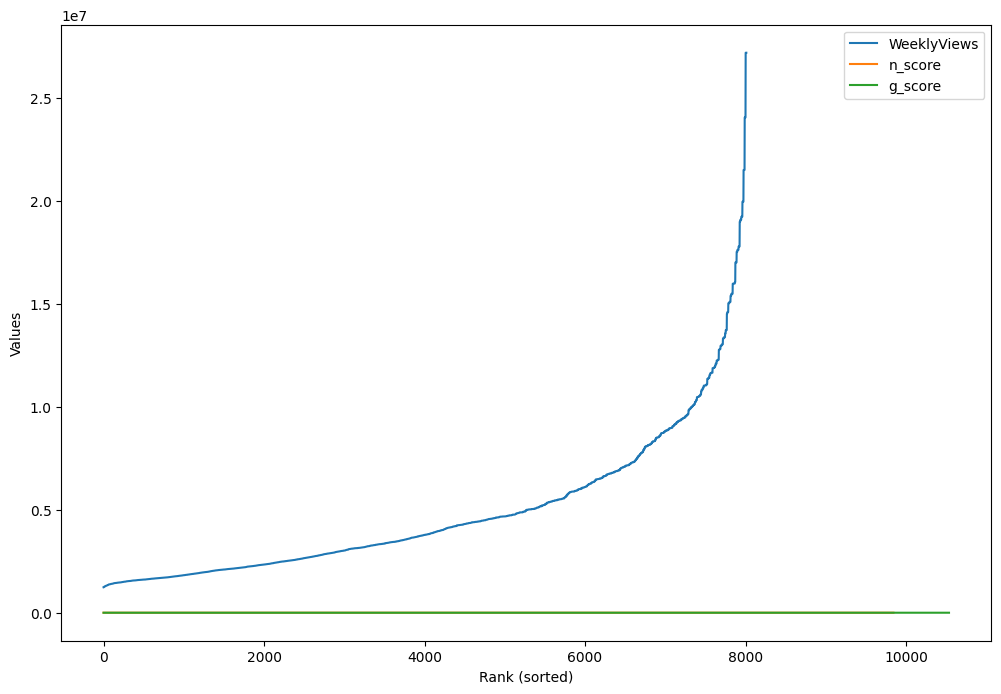

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 각 컬럼에 대한 데이터 정렬
columns_to_plot = ['WeeklyViews', 'n_score', 'g_score']
sorted_data = {col: np.sort(data[col].dropna()) for col in columns_to_plot}

# 그래프 그리기
plt.figure(figsize=(12, 8))

for col in columns_to_plot:
    plt.plot(sorted_data[col], label=col)

# 그래프 설정 (축 표기는 생략)
plt.xlabel('Rank (sorted)')
plt.ylabel('Values')
plt.legend()

# 그래프 보여주기
plt.show()


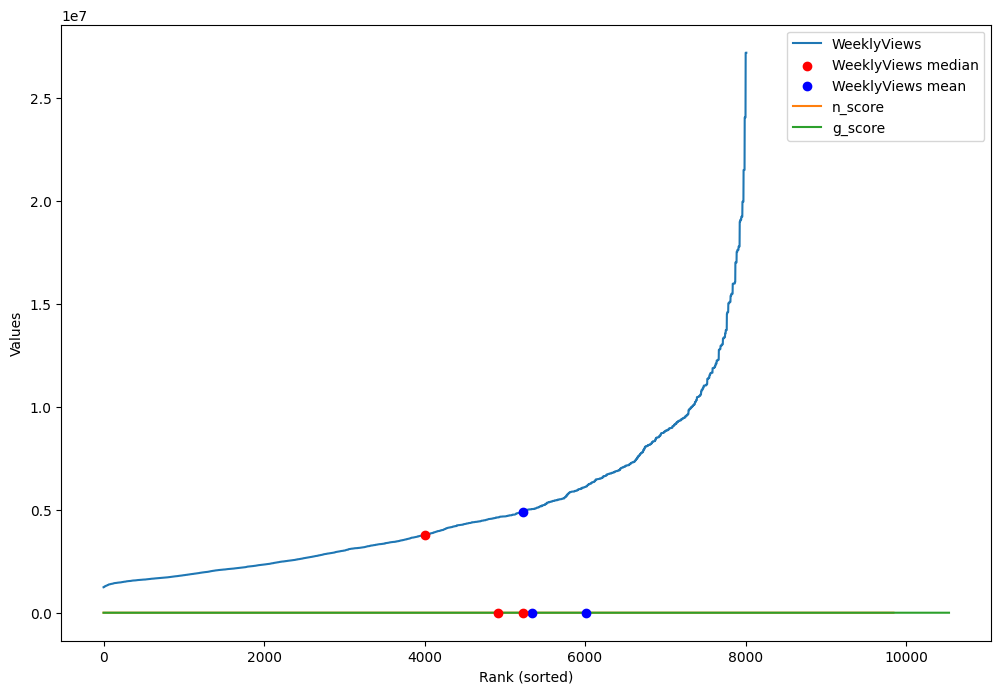

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 각 컬럼에 대한 데이터 정렬
columns_to_plot = ['WeeklyViews', 'n_score', 'g_score']
sorted_data = {col: np.sort(data[col].dropna()) for col in columns_to_plot}

# 각 컬럼의 중간값과 평균값 계산
median_values = data[columns_to_plot].median()
mean_values = data[columns_to_plot].mean()

# 그래프 그리기
plt.figure(figsize=(12, 8))

for col in columns_to_plot:
    # 정렬된 컬럼 데이터
    sorted_col = sorted_data[col]
    plt.plot(sorted_col, label=col)
    
    # 중간값과 평균값의 위치 구하기
    median_value = median_values[col]
    mean_value = mean_values[col]
    
    # 중간값과 평균값이 가장 가까운 위치의 인덱스 구하기
    median_index = np.abs(sorted_col - median_value).argmin()
    mean_index = np.abs(sorted_col - mean_value).argmin()

    # 중간값과 평균값에 점 찍기
    plt.scatter(median_index, median_value, color='red', zorder=5, label=f'{col} median' if col == columns_to_plot[0] else "")
    plt.scatter(mean_index, mean_value, color='blue', zorder=5, label=f'{col} mean' if col == columns_to_plot[0] else "")

# 그래프 설정 (축 표기는 생략)
plt.xlabel('Rank (sorted)')
plt.ylabel('Values')
plt.legend()

# 그래프 보여주기
plt.show()


In [10]:
import pandas as pd

# n_score와 g_score의 결측치를 제외한 값들로 새로운 데이터프레임 생성
data2 = data.dropna(subset=['n_score', 'g_score', 'WeeklyViews'])

# 새로운 데이터프레임의 첫 몇 개의 행을 출력
data2


,date,Rank,Title,New_Artist,Production,Runtime,WeeklyViews,ky_rank,n_score,g_score,...,sub_cate_R&B/Soul,sub_cate_Rap/Hip-hop,sub_cate_Rock,sub_cate_Traditional,sub_cate_Trot,sub_cate_World Music,season_autumn,season_spring,season_summer,season_winter
0,2024-01-21,111,@은영이에게,#안녕,니즈뮤직,292,1494289.0,NaN,44.39183,65.0,...,0,0,0,0,0,0,0,0,0,1
1,2024-01-28,120,@은영이에게,#안녕,니즈뮤직,292,1959168.0,NaN,31.71549,62.0,...,0,0,0,0,0,0,0,0,0,1
2,2024-02-04,147,@은영이에게,#안녕,니즈뮤직,292,1610044.0,NaN,25.52037,61.0,...,0,0,0,0,0,0,0,0,0,1
3,2024-02-11,154,@은영이에게,#안녕,니즈뮤직,292,1400603.0,NaN,24.18861,66.0,...,0,0,0,0,0,0,0,0,0,1
4,2024-02-18,176,@은영이에게,#안녕,니즈뮤직,292,1342797.0,NaN,25.88537,63.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10638,2023-10-01,11,I Love My Body,화사,피네이션,150,1560865.0,NaN,100.00000,91.0,...,0,0,0,0,0,0,1,0,0,0
10639,2023-10-08,13,I Love My Body,화사,피네이션,150,2033636.0,NaN,84.37561,59.0,...,0,0,0,0,0,0,1,0,0,0
10640,2023-10-15,13,I Love My Body,화사,피네이션,150,2035543.0,NaN,54.49134,49.0,...,0,0,0,0,0,0,1,0,0,0
10641,2023-10-22,15,I Love My Body,화사,피네이션,150,2042562.0,NaN,38.92648,44.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# 'Weekly Views'의 컬럼명을 'WeeklyViews'로 변경
data2.rename(columns={'Weekly Views': 'WeeklyViews'}, inplace=True)
data.rename(columns={'Weekly Views': 'WeeklyViews'}, inplace=True)

# 변경된 데이터프레임의 첫 몇 개의 행을 확인
data2.head()


C:\Users\user\AppData\Local\Temp\ipykernel_18056\22152141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns={'Weekly Views': 'WeeklyViews'}, inplace=True)


,date,Rank,Title,New_Artist,Production,Runtime,WeeklyViews,ky_rank,n_score,g_score,...,sub_cate_R&B/Soul,sub_cate_Rap/Hip-hop,sub_cate_Rock,sub_cate_Traditional,sub_cate_Trot,sub_cate_World Music,season_autumn,season_spring,season_summer,season_winter
0,2024-01-21,111,@은영이에게,#안녕,니즈뮤직,292,1494289.0,NaN,44.39183,65.0,...,0,0,0,0,0,0,0,0,0,1
1,2024-01-28,120,@은영이에게,#안녕,니즈뮤직,292,1959168.0,NaN,31.71549,62.0,...,0,0,0,0,0,0,0,0,0,1
2,2024-02-04,147,@은영이에게,#안녕,니즈뮤직,292,1610044.0,NaN,25.52037,61.0,...,0,0,0,0,0,0,0,0,0,1
3,2024-02-11,154,@은영이에게,#안녕,니즈뮤직,292,1400603.0,NaN,24.18861,66.0,...,0,0,0,0,0,0,0,0,0,1
4,2024-02-18,176,@은영이에게,#안녕,니즈뮤직,292,1342797.0,NaN,25.88537,63.0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# Sort the dataframe by 'artist', 'name', and 'week' to ensure proper cumulative counting
data = data.sort_values(by=['New_Artist', 'Title', 'date'])

# Group by 'artist' and 'name', and then apply a cumulative count on the 'week'
data['cumulative_count'] = data.groupby(['New_Artist', 'Title']).cumcount() + 1

# Now create a new column 'cumulative_count_max' that holds the maximum cumulative count for each group
data['cumulative_count_max'] = data.groupby(['New_Artist', 'Title'])['cumulative_count'].transform('max')

# Display the updated DataFrame with the new 'cumulative_count_max' column
print(data[['New_Artist', 'Title', 'date', 'cumulative_count', 'cumulative_count_max']].head())
data.head()

  New_Artist   Title        date  cumulative_count  cumulative_count_max
0        #안녕  @은영이에게  2024-01-21                 1                     5
1        #안녕  @은영이에게  2024-01-28                 2                     5
2        #안녕  @은영이에게  2024-02-04                 3                     5
3        #안녕  @은영이에게  2024-02-11                 4                     5
4        #안녕  @은영이에게  2024-02-18                 5                     5


,date,Rank,Title,New_Artist,Production,Runtime,WeeklyViews,ky_rank,n_score,g_score,...,sub_cate_Rock,sub_cate_Traditional,sub_cate_Trot,sub_cate_World Music,season_autumn,season_spring,season_summer,season_winter,cumulative_count,cumulative_count_max
0,2024-01-21,111,@은영이에게,#안녕,니즈뮤직,292,1494289.0,NaN,44.39183,65.0,...,0,0,0,0,0,0,0,1,1,5
1,2024-01-28,120,@은영이에게,#안녕,니즈뮤직,292,1959168.0,NaN,31.71549,62.0,...,0,0,0,0,0,0,0,1,2,5
2,2024-02-04,147,@은영이에게,#안녕,니즈뮤직,292,1610044.0,NaN,25.52037,61.0,...,0,0,0,0,0,0,0,1,3,5
3,2024-02-11,154,@은영이에게,#안녕,니즈뮤직,292,1400603.0,NaN,24.18861,66.0,...,0,0,0,0,0,0,0,1,4,5
4,2024-02-18,176,@은영이에게,#안녕,니즈뮤직,292,1342797.0,NaN,25.88537,63.0,...,0,0,0,0,0,0,0,1,5,5


In [13]:
# Group by 'date', 'New_Artist', and 'Title', then count the occurrences
grouped_data = data.groupby(['date', 'New_Artist', 'Title']).size().reset_index(name='count')

# Display the result
print(grouped_data)


             date                   New_Artist                         Title  \
0      2023-09-24                          #안녕                     해요 (2022)   
1      2023-09-24                         10cm                         그라데이션   
2      2023-09-24              Christopher, 청하                When I Get Old   
3      2023-09-24           Dan + Shay, 저스틴 비버                  10,000 Hours   
4      2023-09-24                       Sondia                            어른   
...           ...                          ...                           ...   
10187  2024-09-08                          하이키  건물 사이에 피어난 장미 (Rose Blossom)   
10188  2024-09-08                           허각                            물론   
10189  2024-09-08  허각, 임한별, 이무진, 이진성, 김희재, #안녕                        오래된 노래   
10190  2024-09-08                           혁오                        TOMBOY   
10191  2024-09-08                          황인욱                           플러팅   

       count  
0          1  
1        

In [14]:
# Group by 'date', 'New_Artist', and 'Title', then count the occurrences
grouped_data = data.groupby(['date', 'New_Artist', 'Title']).size().reset_index(name='count')

# Filter the rows where the count is 2 or more
filtered_data = grouped_data[grouped_data['count'] >= 2]

# Display the filtered result
print(filtered_data)


             date                   New_Artist                 Title  count
18     2023-09-24                           노을     늦은 밤 너의 집 앞 골목길에서      2
20     2023-09-24                          뉴진스             Attention      2
36     2023-09-24                           디오              Somebody      2
51     2023-09-24                         멜로망스                    선물      2
74     2023-09-24                        샘 스미스  I`m Not The Only One      2
...           ...                          ...                   ...    ...
10089  2024-09-08                       스탠딩 에그                오래된 노래      2
10125  2024-09-08                          유회승                  그랬나봐      2
10126  2024-09-08                       윤도현 밴드                 사랑했나봐      2
10189  2024-09-08  허각, 임한별, 이무진, 이진성, 김희재, #안녕                오래된 노래      2
10190  2024-09-08                           혁오                TOMBOY      2

[485 rows x 4 columns]


In [15]:
# Group by 'date', 'New_Artist', and 'Title', then count the occurrences
grouped_data = data.groupby(['date', 'New_Artist', 'Title']).size().reset_index(name='count')

# Filter the rows where the count is 2 or more
filtered_data = grouped_data[grouped_data['count'] >= 2]

# Merge filtered data back to the original data to find the rows with count >= 2
# and include the 'rank' column in the result
merged_data = data.merge(filtered_data[['date', 'New_Artist', 'Title']], on=['date', 'New_Artist', 'Title'])

# Display the result with 'rank' and other relevant columns
print(merged_data[['date', 'New_Artist', 'Title', 'Rank']])


           date     New_Artist              Title  Rank
0    2023-11-12  Ariana Grande     Last Christmas   140
1    2023-11-12  Ariana Grande     Last Christmas   140
2    2023-11-19  Ariana Grande     Last Christmas   104
3    2023-11-19  Ariana Grande     Last Christmas   104
4    2023-11-26  Ariana Grande     Last Christmas    83
..          ...            ...                ...   ...
970  2024-06-09       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   180
971  2024-06-16       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   188
972  2024-06-16       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   188
973  2024-06-23       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   191
974  2024-06-23       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   191

[975 rows x 4 columns]


In [16]:
data['date'].unique()

array(['2024-01-21', '2024-01-28', '2024-02-04', '2024-02-11',
       '2024-02-18', '2023-11-19', '2023-11-26', '2023-12-03',
       '2023-12-10', '2023-12-17', '2023-12-24', '2023-12-31',
       '2024-01-07', '2024-01-14', '2024-02-25', '2024-03-03',
       '2024-03-10', '2024-03-17', '2024-03-24', '2024-04-07',
       '2024-04-14', '2024-07-07', '2024-08-25', '2023-09-24',
       '2023-10-01', '2023-10-08', '2023-10-15', '2023-10-22',
       '2023-10-29', '2023-11-05', '2023-11-12', '2024-03-31',
       '2024-04-21', '2024-04-28', '2024-05-05', '2024-05-12',
       '2024-05-19', '2024-05-26', '2024-06-02', '2024-06-09',
       '2024-06-16', '2024-06-23', '2024-06-30', '2024-07-14',
       '2024-07-21', '2024-07-28', '2024-08-04', '2024-08-11',
       '2024-08-18', '2024-09-01', '2024-09-08'], dtype=object)

In [17]:
# Drop duplicates to keep only one row per 'date', 'New_Artist', and 'Title' group
unique_data = merged_data.drop_duplicates(subset=['date', 'New_Artist', 'Title'], keep='first')

# Display the result with 'rank' and other relevant columns
print(unique_data[['date', 'New_Artist', 'Title', 'Rank']])


           date     New_Artist              Title  Rank
0    2023-11-12  Ariana Grande     Last Christmas   140
2    2023-11-19  Ariana Grande     Last Christmas   104
4    2023-11-26  Ariana Grande     Last Christmas    83
6    2023-12-03  Ariana Grande     Last Christmas    67
8    2023-12-10  Ariana Grande     Last Christmas    63
..          ...            ...                ...   ...
965  2024-05-26       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   160
967  2024-06-02       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   174
969  2024-06-09       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   180
971  2024-06-16       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   188
973  2024-06-23       화곡동 청개구리  기억해줘요 내 모든 날과 그때를   191

[485 rows x 4 columns]


In [18]:
# Step 1: Drop duplicates from the merged data
unique_data = merged_data.drop_duplicates(subset=['date', 'New_Artist', 'Title'], keep='first')

# Step 2: Remove the rows in the original 'data' where 'date', 'New_Artist', and 'Title' match the duplicated ones
# First, create a list of the duplicated groups
duplicated_groups = filtered_data[['date', 'New_Artist', 'Title']]

# Remove the duplicated groups from the original data
data_without_duplicates = data.merge(duplicated_groups, on=['date', 'New_Artist', 'Title'], how='left', indicator=True)
data_without_duplicates = data_without_duplicates[data_without_duplicates['_merge'] == 'left_only'].drop(columns='_merge')

# Step 3: Append the unique_data back to the original data
updated_data = pd.concat([data_without_duplicates, unique_data], ignore_index=True)

# Display the updated data
print(updated_data)


             date  Rank              Title New_Artist Production  Runtime  \
0      2024-01-21   111             @은영이에게        #안녕       니즈뮤직      292   
1      2024-01-28   120             @은영이에게        #안녕       니즈뮤직      292   
2      2024-02-04   147             @은영이에게        #안녕       니즈뮤직      292   
3      2024-02-11   154             @은영이에게        #안녕       니즈뮤직      292   
4      2024-02-18   176             @은영이에게        #안녕       니즈뮤직      292   
...           ...   ...                ...        ...        ...      ...   
10187  2024-05-26   160  기억해줘요 내 모든 날과 그때를   화곡동 청개구리   kanverse      216   
10188  2024-06-02   174  기억해줘요 내 모든 날과 그때를   화곡동 청개구리   kanverse      216   
10189  2024-06-09   180  기억해줘요 내 모든 날과 그때를   화곡동 청개구리   kanverse      216   
10190  2024-06-16   188  기억해줘요 내 모든 날과 그때를   화곡동 청개구리   kanverse      216   
10191  2024-06-23   191  기억해줘요 내 모든 날과 그때를   화곡동 청개구리   kanverse      216   

       WeeklyViews  ky_rank   n_score  g_score  ...  sub_cate_Rock  \
0    